https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

# Objective of this Notebook is to predict by each column, see which has the highest Accuracy rate, meaning it contributes to feature importance

# Predict on Single Model

In [ ]:
import requests
def get_pass():
    
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)
get_pass()

# Train Model

In [1]:
univ_file_count = 1

In [26]:
# mlp for binary classification
import matplotlib.pyplot as plt

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset

import pandas as pd
import numpy as np
# df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
# df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE_MM.csv',index_col = 0)

df_cols = df.columns.to_list()
print("df_cols:",df_cols)
df_noX = df.iloc[:,:-1]
df_noX

df_cols: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']


age    fnlwgt  education-num  capital-gain  capital-loss  \
0      0.452055  0.048052       0.800000      0.000000           0.0   
1      0.287671  0.137581       0.533333      0.000000           0.0   
2      0.493151  0.150486       0.400000      0.000000           0.0   
3      0.150685  0.220635       0.800000      0.000000           0.0   
4      0.273973  0.184219       0.866667      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32555  0.136986  0.165763       0.733333      0.000000           0.0   
32556  0.315068  0.096129       0.533333      0.000000           0.0   
32557  0.561644  0.094462       0.533333      0.000000           0.0   
32558  0.068493  0.128004       0.533333      0.000000           0.0   
32559  0.479452  0.186482       0.533333      0.150242           0.0   

       hours-per-week  workclass  education  marital-status  occupation  \
0            0.122449      0.750   0.600000        0.333333    0.285714   
1            0.397959      0.500   0.733333        0.000000    0.428571   
2            0.397959      0.500   0.066667        0.333333    0.428571   
3            0.397959      0.500   0.600000        0.333333    0.714286   
4            0.397959      0.500   0.800000        0.333333    0.285714   
...               ...        ...        ...             ...         ...   
32555        0.377551      0.500   0.466667        0.333333    0.928571   
32556        0.397959      0.500   0.733333        0.333333    0.500000   
32557        0.397959      0.500   0.733333        1.000000    0.071429   
32558        0.193878      0.500   0.733333        0.666667    0.071429   
32559        0.397959      0.625   0.733333        0.333333    0.285714   

       relationship  race  sex  native-country  
0               0.0   1.0  1.0        0.951220  
1               0.2   1.0  1.0        0.951220  
2               0.0   0.5  1.0        0.951220  
3               1.0   0.5  0.0        0.121951  
4               1.0   1.0  0.0        0.951220  
...             ...   ...  ...             ...  
32555           1.0   1.0  0.0        0.951220  
32556           0.0   1.0  1.0        0.951220  
32557           0.8   1.0  0.0        0.951220  
32558           0.6   1.0  1.0        0.951220  
32559           1.0   1.0  0.0        0.951220  

[32560 rows x 14 columns]

# Predict on each column

In [27]:
def get_plots():
    
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = [i for i in range(desired_epoch)] #range(1, len(loss)+1)

    plt.plot(epochs, acc, 'y',label = 'Training accuracy')
    plt.plot(epochs, val_acc, 'r',label = 'Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.xlabel('accuracy')
    plt.legend()
    plt.show()

In [28]:
final_accuracy_list = []
test_accuracy_list = []

In [33]:
df.head(2)

age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.452055  0.048052       0.800000           0.0           0.0   
1  0.287671  0.137581       0.533333           0.0           0.0   

   hours-per-week  workclass  education  marital-status  occupation  \
0        0.122449       0.75   0.600000        0.333333    0.285714   
1        0.397959       0.50   0.733333        0.000000    0.428571   

   relationship  race  sex  native-country  class  
0           0.0   1.0  1.0         0.95122      0  
1           0.2   1.0  1.0         0.95122      0

# Predict on all Columns

column_name: workclass
col_num: 6
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Epoch 1/100
458/458 [==============================] - 1s 1ms/step - loss: 0.5592 - accuracy: 0.7640 - val_loss: 0.5588 - val_accuracy: 0.7521
Epoch 2/100
458/458 [==============================] - 0s 823us/step - loss: 0.5541 - accuracy: 0.7579 - val_loss: 0.5595 - val_accuracy: 0.7521
Epoch 3/100
458/458 [==============================] - 0s 805us/step - loss: 0.5570 - accuracy: 0.7559 - val_loss: 0.5598 - val_accuracy: 0.7521
Epoch 4/100
458/458 [==============================] - 0s 832us/step - loss: 0.5514 - accuracy: 0.7601 - val_loss: 0.5588 - val_accuracy: 0.7521
Epoch 5/100
458/458 [==============================] - 0s 949us/step - loss: 0.5530 - accuracy: 0.7576 - val_loss: 0.5583 - val_accuracy: 0.7521
Epoch 6/100
458/458 [==============================] - 0s 807us/step - loss: 0.5515 - accuracy: 0.7586 - val_loss: 0.5589 - val_accuracy: 0.7521
Epoch 7/100
458/458 [=============================

458/458 [==============================] - 0s 788us/step - loss: 0.5417 - accuracy: 0.7606 - val_loss: 0.5549 - val_accuracy: 0.7521
Epoch 57/100
458/458 [==============================] - 0s 770us/step - loss: 0.5406 - accuracy: 0.7598 - val_loss: 0.5553 - val_accuracy: 0.7521
Epoch 58/100
458/458 [==============================] - 0s 961us/step - loss: 0.5439 - accuracy: 0.7576 - val_loss: 0.5556 - val_accuracy: 0.7521
Epoch 59/100
458/458 [==============================] - 0s 772us/step - loss: 0.5418 - accuracy: 0.7588 - val_loss: 0.5536 - val_accuracy: 0.7521
Epoch 60/100
458/458 [==============================] - 0s 765us/step - loss: 0.5397 - accuracy: 0.7627 - val_loss: 0.5537 - val_accuracy: 0.7521
Epoch 61/100
458/458 [==============================] - 0s 771us/step - loss: 0.5394 - accuracy: 0.7616 - val_loss: 0.5539 - val_accuracy: 0.7521
Epoch 62/100
458/458 [==============================] - 0s 766us/step - loss: 0.5346 - accuracy: 0.7647 - val_loss: 0.5536 - val_accuracy

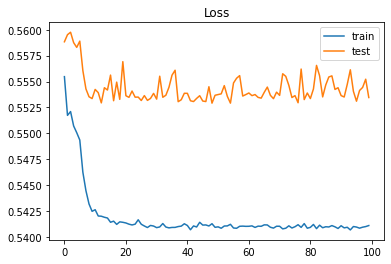

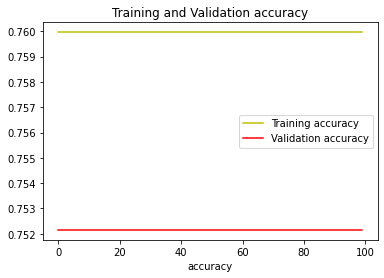

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.3880075
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.2

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.

yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.32830304
yhat[0][0]: 0.

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 

yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.10531548
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]:

yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 

yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 

yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.32830304
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 

yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0

yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.3880075
yhat[0][0]: 0.3880075
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0

yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.10531548
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]:

yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.32830304
yhat[0][0]: 0.23021522
yhat[0][0]: 0.23021522
yhat[0][0]: 0.34462613
yhat[0][0]: 0.23021522
yhat[0][0]: 0.10531548
yhat[0][0]:

458/458 [==============================] - 0s 774us/step - loss: 0.4988 - accuracy: 0.7680 - val_loss: 0.4939 - val_accuracy: 0.7672
Epoch 39/100
458/458 [==============================] - 0s 764us/step - loss: 0.4993 - accuracy: 0.7694 - val_loss: 0.4938 - val_accuracy: 0.7672
Epoch 40/100
458/458 [==============================] - 0s 838us/step - loss: 0.4979 - accuracy: 0.7678 - val_loss: 0.4939 - val_accuracy: 0.7672
Epoch 41/100
458/458 [==============================] - 0s 761us/step - loss: 0.5012 - accuracy: 0.7681 - val_loss: 0.4931 - val_accuracy: 0.7672
Epoch 42/100
458/458 [==============================] - 0s 768us/step - loss: 0.5154 - accuracy: 0.7646 - val_loss: 0.5038 - val_accuracy: 0.7638
Epoch 43/100
458/458 [==============================] - 0s 832us/step - loss: 0.5110 - accuracy: 0.7614 - val_loss: 0.5124 - val_accuracy: 0.7638
Epoch 44/100
458/458 [==============================] - 0s 829us/step - loss: 0.5145 - accuracy: 0.7596 - val_loss: 0.4985 - val_accuracy

458/458 [==============================] - 0s 777us/step - loss: 0.4965 - accuracy: 0.7737 - val_loss: 0.4884 - val_accuracy: 0.7749
Epoch 95/100
458/458 [==============================] - 0s 768us/step - loss: 0.4993 - accuracy: 0.7735 - val_loss: 0.4985 - val_accuracy: 0.7503
Epoch 96/100
458/458 [==============================] - 0s 765us/step - loss: 0.5022 - accuracy: 0.7667 - val_loss: 0.4868 - val_accuracy: 0.7749
Epoch 97/100
458/458 [==============================] - 0s 761us/step - loss: 0.5024 - accuracy: 0.7635 - val_loss: 0.4870 - val_accuracy: 0.7715
Epoch 98/100
458/458 [==============================] - 0s 761us/step - loss: 0.5045 - accuracy: 0.7699 - val_loss: 0.4931 - val_accuracy: 0.7715
Epoch 99/100
458/458 [==============================] - 0s 832us/step - loss: 0.4989 - accuracy: 0.7729 - val_loss: 0.4856 - val_accuracy: 0.7749
Epoch 100/100
102/102 [==============================] - 0s 536us/step - loss: 0.4868 - accuracy: 0.7749
Test Accuracy: 0.775


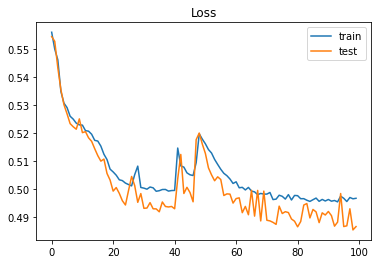

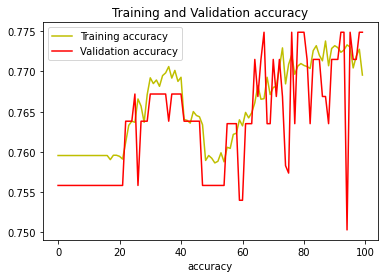

yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.5120233
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0

yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.5120233
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0

yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0]

yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yh

yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.6058254
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6453576
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.6453576
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat

yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026

yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[

yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.5120233
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0]

yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.5120233
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yh

yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.5120233
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0

yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026


yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0]

yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yha

yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.6058254
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
y

yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.5120233
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.174353

yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.5120233
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.6058254
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0

yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.5120233
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0

yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.5120233
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[

yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.5120233
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[

yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.5120233
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]

yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6453576
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][

yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yh

yhat[0][0]: 0.6058254
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.6058254
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.5120233
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.6058254


yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.5120233
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.55852747
yhat[0][0]: 0.33511627
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287


yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287


yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat

yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.23482189
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004

yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.5120233
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.6058254
yhat[0][0

yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.55852747
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[

yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747


yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.23482189
yhat[0][0]: 0.6453576
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.6058254
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0

yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]

yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.6453576
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yh

yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.5120233
yhat[0][0]: 0.06648004
yhat[0][0]: 0.5120233
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287


yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yha

yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
y

yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.5120233
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.5120233
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.33511627
yhat[0][0]: 0.23482189
yhat[0][0]: 0.5120233
yha

yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
y

yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.5120233


yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.5120233
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yh

yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yh

yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[0][0]: 0.33511627
yhat[0][0]: 0.06648004
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.21117026
yhat[0][0]: 0.33511627
yhat[

yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[

yhat[0][0]: 0.23482189
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.23482189
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.55852747
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.23482189
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.21117026
yhat[0][0]: 0.1743536

yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.33511627
yhat[0][0]: 0.6058254
yhat[0][0]: 0.06648004
yhat[0][0]: 0.33511627
yhat[0][0]: 0.45289287
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.55852747
yhat[0][0]: 0.45289287
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.1743536
yhat[0][0]: 0.21117026
yhat[0][0]: 0.45289287
yhat[0][0]: 0.23482189
yhat[0][0]: 0.6058254
yhat[0][0]: 0.1743536
yhat[0][0]: 0.06648004
yhat[0][0]: 0.06648004
yhat[0][0]: 0.1743536
yhat[0][0]: 0.6058254
yhat[0][0]: 0.06648004
yhat[0][0]: 0.45289287
yhat[0][0]: 0.55852747
yhat[0][0]: 0.06648004
yhat

Epoch 18/100
458/458 [==============================] - 0s 755us/step - loss: 0.4420 - accuracy: 0.7626 - val_loss: 0.4630 - val_accuracy: 0.7571
Epoch 19/100
458/458 [==============================] - 0s 761us/step - loss: 0.4472 - accuracy: 0.7611 - val_loss: 0.4633 - val_accuracy: 0.7571
Epoch 20/100
458/458 [==============================] - 0s 761us/step - loss: 0.4476 - accuracy: 0.7608 - val_loss: 0.4628 - val_accuracy: 0.7571
Epoch 21/100
458/458 [==============================] - 0s 757us/step - loss: 0.4569 - accuracy: 0.7559 - val_loss: 0.4631 - val_accuracy: 0.7571
Epoch 22/100
458/458 [==============================] - 0s 757us/step - loss: 0.4473 - accuracy: 0.7582 - val_loss: 0.4589 - val_accuracy: 0.7571
Epoch 23/100
458/458 [==============================] - 0s 761us/step - loss: 0.4471 - accuracy: 0.7556 - val_loss: 0.4575 - val_accuracy: 0.7571
Epoch 24/100
458/458 [==============================] - 0s 763us/step - loss: 0.4438 - accuracy: 0.7572 - val_loss: 0.4575 -

458/458 [==============================] - 0s 757us/step - loss: 0.4429 - accuracy: 0.7608 - val_loss: 0.4587 - val_accuracy: 0.7571
Epoch 75/100
458/458 [==============================] - 0s 761us/step - loss: 0.4508 - accuracy: 0.7575 - val_loss: 0.4582 - val_accuracy: 0.7571
Epoch 76/100
458/458 [==============================] - 0s 752us/step - loss: 0.4484 - accuracy: 0.7536 - val_loss: 0.4579 - val_accuracy: 0.7571
Epoch 77/100
458/458 [==============================] - 0s 751us/step - loss: 0.4418 - accuracy: 0.7610 - val_loss: 0.4585 - val_accuracy: 0.7571
Epoch 78/100
458/458 [==============================] - 0s 937us/step - loss: 0.4444 - accuracy: 0.7582 - val_loss: 0.4597 - val_accuracy: 0.7571
Epoch 79/100
458/458 [==============================] - 0s 755us/step - loss: 0.4426 - accuracy: 0.7598 - val_loss: 0.4578 - val_accuracy: 0.7571
Epoch 80/100
458/458 [==============================] - 0s 748us/step - loss: 0.4423 - accuracy: 0.7602 - val_loss: 0.4580 - val_accuracy

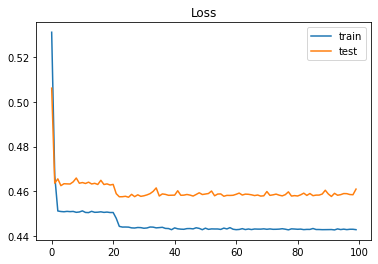

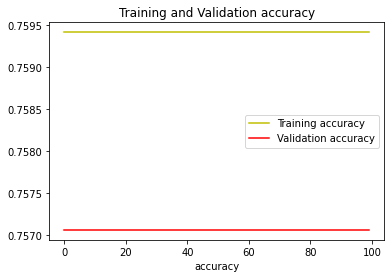

yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.427083

yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524


yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.02

yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 

yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.

yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]

yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.4270830

yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.06560406
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027

yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334


yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.

yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.06560406
yhat[0][0]: 0.0

yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768

yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.0

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.036604524
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.03660

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.06560406
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027

yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.

yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.4270

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.4270

yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.4

yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027

yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.4270830

yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.06560406
yhat

yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.06560406
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.03660

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.02778333

yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.0

yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.06560406
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.4270

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783

yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027

yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708

yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.427083

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305

yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.0

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.427083

yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.02

yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.06560406
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.06560406
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.02778

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.02

yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.427

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.0366

yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.0

yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.036604524
yhat[0][0]: 0.027783334
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.031900346
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.42708305
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.027783334
yhat[0][0]: 0.08768755
yhat[0][0]: 0.036604524
yhat[0][0]: 0.42708305
yhat[0][0]: 0.08768755
yhat[0][0]: 0.42708305
count: 1427
We have confidence score of 0.7135
column_name: occupation
col_num: 9
(29304,) (3256,) (29304,) (3256,)
n_features: 1
Epoch 1/100
458/458 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.7584 - val_loss: 0.5641 - val_accuracy: 0.7518
Epoch 2/100
458/458 [==============================] - 0s 799us/step - loss: 0.5456 - accuracy: 0.7630 - val_loss: 0.55

458/458 [==============================] - 0s 786us/step - loss: 0.4852 - accuracy: 0.7635 - val_loss: 0.4971 - val_accuracy: 0.7518
Epoch 53/100
458/458 [==============================] - 0s 790us/step - loss: 0.4893 - accuracy: 0.7610 - val_loss: 0.4944 - val_accuracy: 0.7518
Epoch 54/100
458/458 [==============================] - 0s 785us/step - loss: 0.4878 - accuracy: 0.7604 - val_loss: 0.4948 - val_accuracy: 0.7518
Epoch 55/100
458/458 [==============================] - 0s 781us/step - loss: 0.4895 - accuracy: 0.7620 - val_loss: 0.4986 - val_accuracy: 0.7518
Epoch 56/100
458/458 [==============================] - 0s 779us/step - loss: 0.4920 - accuracy: 0.7619 - val_loss: 0.5003 - val_accuracy: 0.7518
Epoch 57/100
458/458 [==============================] - 0s 779us/step - loss: 0.4968 - accuracy: 0.7585 - val_loss: 0.4976 - val_accuracy: 0.7518
Epoch 58/100
458/458 [==============================] - 0s 781us/step - loss: 0.4875 - accuracy: 0.7604 - val_loss: 0.4937 - val_accuracy

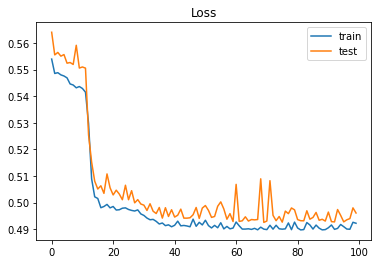

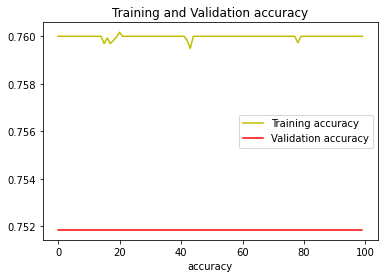

yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.35379183
yhat[0][0]: 0.09999132
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 

yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.24094334
yhat[0][0]: 0.29422247
yhat[0][0]: 

yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.35379183
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]

yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 

yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41

yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][

yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.042232603
yhat[0][0]:

yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.35379183
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0

yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.35379183
yhat[0][0]: 0.097465426
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.0949966
yhat[0][0]: 0.35379183
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0

yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.10216558
yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][

yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.097465426
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0]

yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.0949966
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.

yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.0949966
yhat[0][0]: 0.097465426
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]:

yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.35379183
yhat[0][0]: 0.097465426
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.35379183
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]

yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.097465426
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]:

yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][

yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.35379183
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]:

yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.35379183
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.35379183
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0]

yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1

yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.0949966
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.24094334
yhat[0][0]: 0.10216558
yhat[0][0]: 0.

yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]

yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.24094334
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.35379183
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.19465125
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]

yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.0949966
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.

yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.0949966
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.35379183
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.229

yhat[0][0]: 0.097465426
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.35379183
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.

yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.35379183
yhat[0][0]: 0.0949966
yhat[0][0]: 0.24094334
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]

yhat[0][0]: 0.24094334
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.10216558
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0]

yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.097465426
yhat[0][0]: 0.097465426
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.24094334
yhat[0][0]: 0.0949966
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.24094334
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0]

yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.19

yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.35379183
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.24094334
yhat[0][0]: 0.0949966
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat

yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.35379183
yhat[0][0]: 0.097465426
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.35379183
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22

yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.24094334
yhat[0][0]: 0.097465426
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0]

yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.09999132
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0

yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.35379183
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 

yhat[0][0]: 0.35379183
yhat[0][0]: 0.097465426
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.097465426
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][

yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0]

yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.0949966
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.35379183
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.0949966
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.13850

yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.0949966
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.09999132
yhat[0][0]: 0.097465426
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.09999132
yhat[0][0]: 0.09999132
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0

yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.35379183
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.19465125
yhat[0][0]: 0.22987479
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.24094334
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]

yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.0949966
yhat[0][0]: 0.097465426
yhat[0][0]: 0.097465426
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.24094334
yhat[0][0]: 0.097465426
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.10216558
yhat[0][0]: 0.0949966
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.24094334
yhat[0][0]: 0.09999132
yhat[0][0]: 0.097465426
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 

yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.09999132
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.19465125
yhat[0][0]: 0.41827404
yhat[0][0]: 0.35379183
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.097465426
yhat[0][0]: 0.41827404
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.47204876
yhat[0][0]: 0.4

yhat[0][0]: 0.24094334
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.24094334
yhat[0][0]: 0.1385099
yhat[0][0]: 0.35379183
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.10216558
yhat[0][0]: 0.10216558
yhat[0][0]: 0.19465125
yhat[0][0]: 0.0949966
yhat[0][0]: 0.10216558
yhat[0][0]: 0.1385099
yhat[0][0]: 0.35379183
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.472

yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.0949966
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.35379183
yhat[0][0]: 0.35379183
yhat[0][0]: 0.097465426
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.0949966
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.042232603
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.1

yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0][0]: 0.0949966
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.35379183
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.35379183
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.09999132
yhat[0][0]: 0.1385099
yhat[0][0]: 0.10216558
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.042232603
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.09999132
yhat[0][0]

yhat[0][0]: 0.1385099
yhat[0][0]: 0.22987479
yhat[0][0]: 0.35379183
yhat[0][0]: 0.47204876
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.097465426
yhat[0][0]: 0.10216558
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.10216558
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.097465426
yhat[0][0]: 0.097465426
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.41827404
yhat[0][0]: 0.47204876
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.47204876
yhat[0][0]: 0.22987479
yhat[0][0]: 0.24094334
yhat[0][0]: 0.22987479
yhat[0][0]: 0.097465426
yhat[0][0]: 0.0949966
yhat[0][0]: 0.10216558
yhat[0][0]: 0.042232603
yhat[0]

yhat[0][0]: 0.22987479
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.097465426
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.35379183
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.19465125
yhat[0][0]: 0.47204876
yhat[0][0]: 0.1385099
yhat[0][0]: 0.47204876
yhat[0][0]: 0.29422247
yhat[0][0]: 0.1385099
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.29422247
yhat[0][0]: 0.41827404
yhat[0][0]: 0.1385099
yhat[0][0]: 0.09999132
yhat[0][0]: 0.41827404
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.22987479
yhat[0][0]: 0.042232603
yhat[0][0]: 0.22987479
yhat[0][0]: 0.29422247
yhat[0][0]: 0.29422247
yhat[0][0]: 0.47204876
yhat[0][0]: 0.042232603
yhat[0][0]: 0.19465125
yhat[0][0]: 0.35379183
yhat[0][0]: 0.042232603
yhat[0][0]: 0.10216558
yhat[0][0]: 0.24094334
yhat[0][0]

458/458 [==============================] - 0s 799us/step - loss: 0.4409 - accuracy: 0.7559 - val_loss: 0.4348 - val_accuracy: 0.7623
Epoch 39/100
458/458 [==============================] - 0s 792us/step - loss: 0.4450 - accuracy: 0.7552 - val_loss: 0.4372 - val_accuracy: 0.7623
Epoch 40/100
458/458 [==============================] - 0s 770us/step - loss: 0.4457 - accuracy: 0.7571 - val_loss: 0.4353 - val_accuracy: 0.7623
Epoch 41/100
458/458 [==============================] - 0s 777us/step - loss: 0.4363 - accuracy: 0.7596 - val_loss: 0.4344 - val_accuracy: 0.7623
Epoch 42/100
458/458 [==============================] - 0s 762us/step - loss: 0.4373 - accuracy: 0.7619 - val_loss: 0.4363 - val_accuracy: 0.7623
Epoch 43/100
458/458 [==============================] - 0s 769us/step - loss: 0.4430 - accuracy: 0.7609 - val_loss: 0.4366 - val_accuracy: 0.7623
Epoch 44/100
458/458 [==============================] - 0s 771us/step - loss: 0.4346 - accuracy: 0.7610 - val_loss: 0.4358 - val_accuracy

458/458 [==============================] - 0s 770us/step - loss: 0.4394 - accuracy: 0.7606 - val_loss: 0.4340 - val_accuracy: 0.7623
Epoch 95/100
458/458 [==============================] - 0s 764us/step - loss: 0.4442 - accuracy: 0.7569 - val_loss: 0.4349 - val_accuracy: 0.7623
Epoch 96/100
458/458 [==============================] - 0s 776us/step - loss: 0.4365 - accuracy: 0.7619 - val_loss: 0.4346 - val_accuracy: 0.7623
Epoch 97/100
458/458 [==============================] - 0s 768us/step - loss: 0.4334 - accuracy: 0.7615 - val_loss: 0.4344 - val_accuracy: 0.7623
Epoch 98/100
458/458 [==============================] - 0s 766us/step - loss: 0.4376 - accuracy: 0.7574 - val_loss: 0.4359 - val_accuracy: 0.7623
Epoch 99/100
458/458 [==============================] - 0s 967us/step - loss: 0.4398 - accuracy: 0.7545 - val_loss: 0.4342 - val_accuracy: 0.7623
Epoch 100/100
102/102 [==============================] - 0s 545us/step - loss: 0.4344 - accuracy: 0.7623
Test Accuracy: 0.762


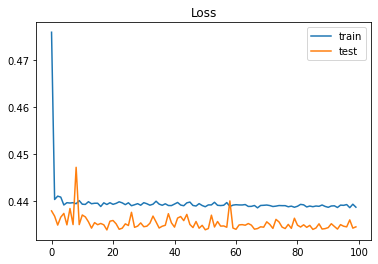

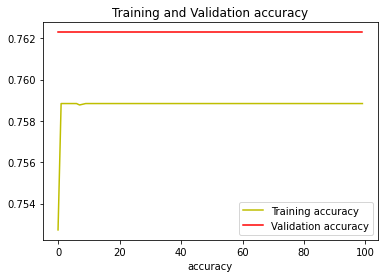

yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0

yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][

yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][

yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0

yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 

yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0

yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][

yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[

yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yh

yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]:

yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat

yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat

yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0

yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0]

yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat

yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][

yhat[0][0]: 0.4720291
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0]

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat

yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yha

yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[

yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][

yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][

yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0]

yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0]

yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0

yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[

yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]:

yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]:

yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0

yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][

yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0

yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0

yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0]

yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][

yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0

yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][

yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yha

yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.4720291
yhat[0][0]

yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0

yhat[0][0]: 0.05886197
yhat[0][0]: 0.05886197
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.4720291
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.02890712
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.4720291
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0]

yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.009614944
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.02890712
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.05886197
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.05886197
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.009614944
yhat[0][0]: 0.44501644
yhat[0][0]: 0.44501644
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.10752857
yhat[0][0]: 0.44501644
yhat[0]

458/458 [==============================] - 0s 773us/step - loss: 0.5436 - accuracy: 0.7621 - val_loss: 0.5488 - val_accuracy: 0.7568
Epoch 24/100
458/458 [==============================] - 0s 759us/step - loss: 0.5443 - accuracy: 0.7614 - val_loss: 0.5538 - val_accuracy: 0.7568
Epoch 25/100
458/458 [==============================] - 0s 767us/step - loss: 0.5465 - accuracy: 0.7604 - val_loss: 0.5488 - val_accuracy: 0.7568
Epoch 26/100
458/458 [==============================] - 0s 766us/step - loss: 0.5412 - accuracy: 0.7635 - val_loss: 0.5488 - val_accuracy: 0.7568
Epoch 27/100
458/458 [==============================] - 0s 768us/step - loss: 0.5439 - accuracy: 0.7616 - val_loss: 0.5493 - val_accuracy: 0.7568
Epoch 28/100
458/458 [==============================] - 0s 766us/step - loss: 0.5486 - accuracy: 0.7564 - val_loss: 0.5491 - val_accuracy: 0.7568
Epoch 29/100
458/458 [==============================] - 0s 759us/step - loss: 0.5457 - accuracy: 0.7603 - val_loss: 0.5490 - val_accuracy

458/458 [==============================] - 0s 766us/step - loss: 0.5493 - accuracy: 0.7574 - val_loss: 0.5492 - val_accuracy: 0.7568
Epoch 80/100
458/458 [==============================] - 0s 759us/step - loss: 0.5479 - accuracy: 0.7589 - val_loss: 0.5489 - val_accuracy: 0.7568
Epoch 81/100
458/458 [==============================] - 0s 768us/step - loss: 0.5473 - accuracy: 0.7595 - val_loss: 0.5494 - val_accuracy: 0.7568
Epoch 82/100
458/458 [==============================] - 0s 760us/step - loss: 0.5465 - accuracy: 0.7602 - val_loss: 0.5489 - val_accuracy: 0.7568
Epoch 83/100
458/458 [==============================] - 0s 761us/step - loss: 0.5441 - accuracy: 0.7614 - val_loss: 0.5490 - val_accuracy: 0.7568
Epoch 84/100
458/458 [==============================] - 0s 762us/step - loss: 0.5441 - accuracy: 0.7624 - val_loss: 0.5494 - val_accuracy: 0.7568
Epoch 85/100
458/458 [==============================] - 0s 761us/step - loss: 0.5443 - accuracy: 0.7615 - val_loss: 0.5494 - val_accuracy

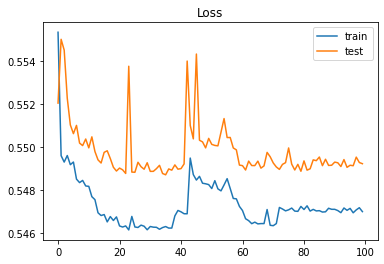

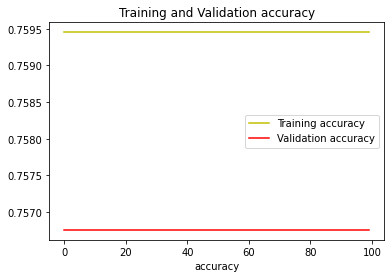

yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.12558642
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.13006386
yhat[0][0]:

yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]: 0.24814615
yhat[0][0]:

Epoch 35/100
458/458 [==============================] - 0s 752us/step - loss: 0.5297 - accuracy: 0.7561 - val_loss: 0.5093 - val_accuracy: 0.7681
Epoch 36/100
458/458 [==============================] - 0s 755us/step - loss: 0.5261 - accuracy: 0.7602 - val_loss: 0.5090 - val_accuracy: 0.7681
Epoch 37/100
458/458 [==============================] - 0s 756us/step - loss: 0.5222 - accuracy: 0.7638 - val_loss: 0.5100 - val_accuracy: 0.7681
Epoch 38/100
458/458 [==============================] - 0s 751us/step - loss: 0.5286 - accuracy: 0.7577 - val_loss: 0.5087 - val_accuracy: 0.7681
Epoch 39/100
458/458 [==============================] - 0s 947us/step - loss: 0.5321 - accuracy: 0.7546 - val_loss: 0.5103 - val_accuracy: 0.7681
Epoch 40/100
458/458 [==============================] - 0s 761us/step - loss: 0.5270 - accuracy: 0.7584 - val_loss: 0.5109 - val_accuracy: 0.7681
Epoch 41/100
458/458 [==============================] - 0s 748us/step - loss: 0.5287 - accuracy: 0.7554 - val_loss: 0.5103 -

458/458 [==============================] - 0s 757us/step - loss: 0.5332 - accuracy: 0.7563 - val_loss: 0.5085 - val_accuracy: 0.7681
Epoch 92/100
458/458 [==============================] - 0s 753us/step - loss: 0.5307 - accuracy: 0.7562 - val_loss: 0.5086 - val_accuracy: 0.7681
Epoch 93/100
458/458 [==============================] - 0s 761us/step - loss: 0.5287 - accuracy: 0.7565 - val_loss: 0.5105 - val_accuracy: 0.7681
Epoch 94/100
458/458 [==============================] - 0s 754us/step - loss: 0.5273 - accuracy: 0.7593 - val_loss: 0.5094 - val_accuracy: 0.7681
Epoch 95/100
458/458 [==============================] - 0s 751us/step - loss: 0.5254 - accuracy: 0.7613 - val_loss: 0.5091 - val_accuracy: 0.7681
Epoch 96/100
458/458 [==============================] - 0s 838us/step - loss: 0.5324 - accuracy: 0.7554 - val_loss: 0.5090 - val_accuracy: 0.7681
Epoch 97/100
458/458 [==============================] - 0s 814us/step - loss: 0.5261 - accuracy: 0.7589 - val_loss: 0.5093 - val_accuracy

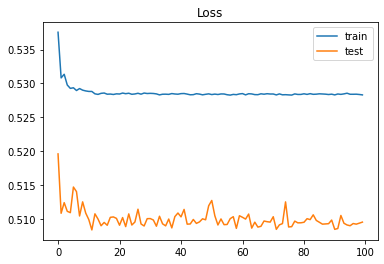

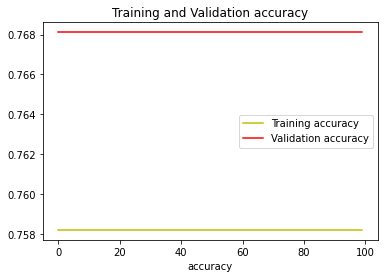

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.315192

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yh

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
y

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yh

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yha

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246


yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.3151924

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
y

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yha

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.315192

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
y

yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yh

yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yh

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
y

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
y

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892


yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
y

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0]

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[

yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0]

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat

yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246


yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yha

yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yha

yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yha

yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yh

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][

yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.1103892
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
yhat[0][0]: 0.31519246
y

458/458 [==============================] - 0s 781us/step - loss: 0.5525 - accuracy: 0.7583 - val_loss: 0.5455 - val_accuracy: 0.7650
Epoch 19/100
458/458 [==============================] - 0s 814us/step - loss: 0.5514 - accuracy: 0.7596 - val_loss: 0.5454 - val_accuracy: 0.7650
Epoch 20/100
458/458 [==============================] - 0s 812us/step - loss: 0.5567 - accuracy: 0.7550 - val_loss: 0.5462 - val_accuracy: 0.7650
Epoch 21/100
458/458 [==============================] - 0s 810us/step - loss: 0.5546 - accuracy: 0.7564 - val_loss: 0.5452 - val_accuracy: 0.7650
Epoch 22/100
458/458 [==============================] - 0s 810us/step - loss: 0.5571 - accuracy: 0.7543 - val_loss: 0.5454 - val_accuracy: 0.7650
Epoch 23/100
458/458 [==============================] - 0s 772us/step - loss: 0.5502 - accuracy: 0.7604 - val_loss: 0.5455 - val_accuracy: 0.7650
Epoch 24/100
458/458 [==============================] - 0s 768us/step - loss: 0.5503 - accuracy: 0.7607 - val_loss: 0.5455 - val_accuracy

458/458 [==============================] - 0s 807us/step - loss: 0.5519 - accuracy: 0.7589 - val_loss: 0.5457 - val_accuracy: 0.7650
Epoch 75/100
458/458 [==============================] - 0s 816us/step - loss: 0.5563 - accuracy: 0.7551 - val_loss: 0.5459 - val_accuracy: 0.7650
Epoch 76/100
458/458 [==============================] - 0s 781us/step - loss: 0.5563 - accuracy: 0.7548 - val_loss: 0.5454 - val_accuracy: 0.7650
Epoch 77/100
458/458 [==============================] - 0s 790us/step - loss: 0.5501 - accuracy: 0.7604 - val_loss: 0.5452 - val_accuracy: 0.7650
Epoch 78/100
458/458 [==============================] - 0s 799us/step - loss: 0.5497 - accuracy: 0.7609 - val_loss: 0.5455 - val_accuracy: 0.7650
Epoch 79/100
458/458 [==============================] - 0s 782us/step - loss: 0.5513 - accuracy: 0.7592 - val_loss: 0.5454 - val_accuracy: 0.7650
Epoch 80/100
458/458 [==============================] - 0s 807us/step - loss: 0.5568 - accuracy: 0.7546 - val_loss: 0.5451 - val_accuracy

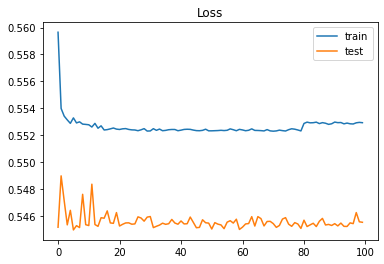

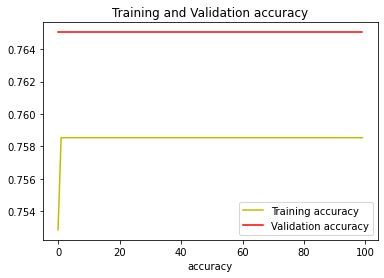

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]: 0.24581158
yhat[0][0]:

In [35]:
desired_epoch = 100
desired_batch_size = 64
prob_value = 0.3
from tensorflow import keras 

# from keras.optimizers import SGD
for col_num in range(6, df_noX.shape[1]):
# col_num = 0
    print("column_name:",df_cols[col_num])
    print("col_num:",col_num)
    

    # Get X for each Column
    X = df_noX.iloc[:,col_num].to_numpy()
    y = df.iloc[:,-1].to_numpy()

    # ensure all data are floating point values
    X = X.astype('float32')
    # encode strings to integer
    y = LabelEncoder().fit_transform(y)
    # split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    # determine the number of input features
    n_features = 1#X_train.shape[1]
    print("n_features:",n_features)
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    # fit the model
#     model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
    history = model.fit(X_train, y_train, epochs=desired_epoch, batch_size=desired_batch_size, verbose=1, validation_data=(X_test, y_test))

    # evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    print('Test Accuracy: %.3f' % acc)
    test_accuracy_list.append(acc)
    
    #get plots
    get_plots()
    
    # make a prediction
    P_list = []

    df_test = pd.read_csv('./dataset/adult_test_RenameCol_MinMax_LE_MM.csv',index_col = 0)
    for i in range(len(df_test)):
        df_test_topred = df_test.iloc[i, col_num]
        df_test_topred = np.array(df_test_topred).reshape(1,-1)

        #predict
        yhat = model.predict(df_test_topred)
        P_list.append(yhat[0][0])
        print("yhat[0][0]:",yhat[0][0])
    binary_list = []
    
    for p in P_list:
        if p >= prob_value:
            binary_list .append(1)
        else:
            binary_list .append(0)

    col_name_fordf = 'P_' + str(df_cols[col_num]) + 'p=' + str(prob_value)

    df_binary = pd.DataFrame(binary_list,columns = ['binary_pred'])
    df_P_list = pd.DataFrame(P_list,columns = [col_name_fordf])
    df_pred = pd.concat([df_binary, df_P_list],axis=1)
    df_pred_wactual = pd.concat([df_pred, df_test['class']],axis=1)
    df_pred_wactual
    df_pred_wactual.to_csv('./results/DBS_Part4_Type2_{}_{}.csv'.format(df_cols[col_num],univ_file_count))
    
    count = 0
    for i in range(len(df_pred_wactual))[:2000]:#shorten
        if df_pred_wactual.iloc[i,0] == df_pred_wactual.iloc[i,2]: 
            count+=1
    print("count:",count)
    final_accuracy = count/2000 # len(df_pred_wactual)
    print('We have confidence score of {}'.format(final_accuracy))
    final_accuracy_list.append(final_accuracy)

In [ ]:
get_pass()

In [ ]:
# col_name_fordf = 'P_' + str(df_cols[col_num])

# # for p in P_list:
# #     if p > 0.5:
# #         binary_list.append(1)
# #     else:
# #         binary_list.append(0)
# df_binary = pd.DataFrame(binary_list,columns = ['binary_pred'])
# df_binary


# df_P_list = pd.DataFrame(P_list,columns = [col_name_fordf])
# df_pred = pd.concat([df_binary, df_P_list],axis=1)
# df_pred_wactual = pd.concat([df_pred, df_test['class']],axis=1)
# df_pred_wactual.to_csv('./results/DBS_Part4_Type2_{}.csv'.format(df_cols[col_num]))
# df_pred_wactual


In [ ]:
# df_pred_wactual = pd.concat([df_pred, df_test['class'],df_test.iloc[:, col_num]],axis=1)
# df_pred_wactual



In [ ]:

# count = 0
# for i in range(len(df_pred_wactual)):
#     if df_pred_wactual.iloc[i,0] == df_pred_wactual.iloc[i,2]: 
#         count+=1
# print("count:",count)
# final_accuracy = count/len(df_pred_wactual)
# print('We have confidence score of {}'.format(final_accuracy))
# final_accuracy_list.append(final_accuracy)

# Made Error so i had to get back results. To DELETE

In [ ]:
final_accuracy_list

df_total_dev_test_acc = pd.read_csv('./results/MLP Feature Importance Accuracy (Part 4).csv',index_col = 0)
test_accuracy_list = df_total_dev_test_acc.iloc[1, :].to_list()
test_accuracy_list


In [ ]:


df_final_accuracy = pd.DataFrame(final_accuracy_list, columns= ['test_Accuracy'])
df_test_accuracy = pd.DataFrame(test_accuracy_list, columns= ['dev_Accuracy'])

df_test_accuracy
df_total_dev_test_acc = pd.concat([df_test_accuracy,df_final_accuracy],axis=1).T
df_total_dev_test_acc
df_total_dev_test_acc.columns = df_cols[:-1]
# # df_total_dev_test_acc.to_csv('./results/MLP Feature Importance Accuracy (Part 4).csv')
df_total_dev_test_acc


In [ ]:
def get_sorted(ndarray, colname):

    ndarray, colname = zip(*sorted(zip(ndarray, colname)))

    return ndarray, colname

def get_plot(X_cols, importance):
    # plot feature importance
    plt.bar(X_cols, importance)
    plt.xticks(X_cols, X_cols, color='orange', rotation=90, fontweight='bold', fontsize='15')
    plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3)

    plt.show()
get_plot(df_cols[:-1], test_accuracy_list)
test_accuracy_list

In [ ]:
type(df_cols[:-1])
type(test_accuracy_list)


# Predict for each test row 

In [ ]:
import requests
def get_pass():
    
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)
get_pass()